# Comparison of theoretical and empirical PDF and CDF

We have $A$ and $C$ are i.i.d $\mathcal{U}(0, 1)$ variates. We define $X = AC$. We aim to verify that the theoretical values of PDF and CDF obtained in the literature are the same ones observed experimentally.

## Step 0: Setup

We import all the packages necessary. We also set the figure size to our convenience.

In [1]:
from matplotlib import pyplot as plt

import math
import numpy as np
import pandas as pd
import random
import seaborn as sb

In [2]:
# This command is used to set the size of the plots generated
plt.rcParams["figure.figsize"] = (7, 7)

## Step 1: Simulation

We define our sampling function and the number of data points we wish to sample. We proceed to aggregate the data and plot the regular histogram and the cumulative frequency graph for it.

In [3]:
# Change this value to increase or decrease the number of samples
samples = 20_000

In [4]:
def get_sample_value():
    """
    It obtains two random values sampled from U(0, 1)
    for a and c. Their product is returned.
    """
    a = random.uniform(0, 1)
    c = random.uniform(0, 1)
    return a * c

In [5]:
data = [get_sample_value() for _ in range(samples)]
series = pd.Series(data, name="X=AC")

<AxesSubplot:xlabel='X=AC'>

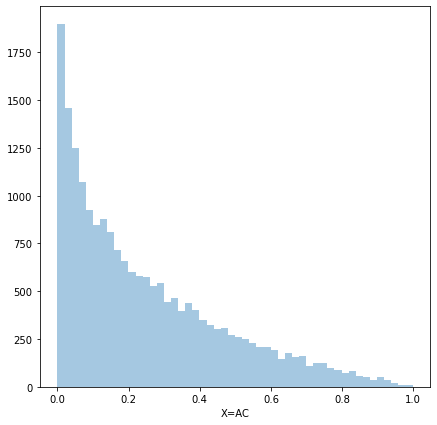

In [6]:
# Regular histogram plot
plot = sb.distplot(series, kde=False, bins=50)
plot

<AxesSubplot:xlabel='X=AC'>

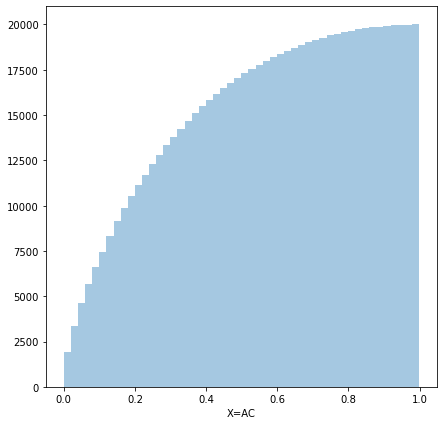

In [16]:
# Cumulative frequency plot
plot = sb.distplot(series, hist_kws={'cumulative': True}, kde=False, bins=50)
plot

## Step 2: Plot Theoretical Functions

We proceed to plot the graphs for the theoretical values of the PDF and the CDF. The scales will not match, but the general shape for the corresponding graphs should be the same. This is how we verify that the calculations we performed are correct and represent the empirical data accurately.

In [8]:
def pdf(x):
    """
    Returns the value of the probability distribution function at x.
    """
    return -math.log(x) if x > 0 else None

In [9]:
def cdf(x):
    """
    Returns the value of the cumulative probability distribution function at x.
    """
    return x * (1 - math.log(x)) if x > 0 else 0

In [10]:
# Change this variable to increase or decrease the number of points for the graphs
points = 100

In [11]:
# This collection of values will be used to calculate the values of the function for the plots
x_points = np.arange(0, 1, 1.0 / points)

In [12]:
# y values for the PDF
y_points = [pdf(x) for x in x_points]

<AxesSubplot:xlabel='X=AC', ylabel='Probability Distribution Function - f(X)'>

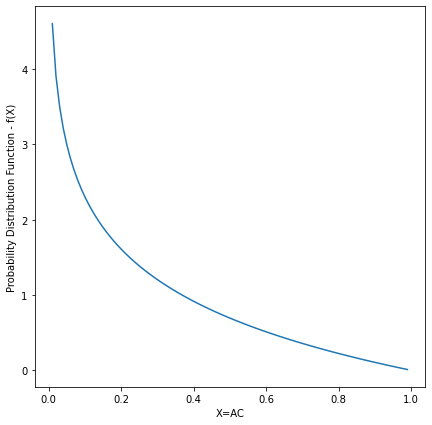

In [13]:
x_label = "X=AC"
y_label = "Probability Distribution Function - f(X)"
pdf_data = pd.DataFrame(zip(x_points, y_points), columns=[x_label, y_label])
sb.lineplot(x=x_label, y=y_label, data=pdf_data)

In [14]:
# y values for the CDF
y_points = [cdf(x) for x in x_points]

<AxesSubplot:xlabel='X=AC', ylabel='Cumulative Distribution Function - F(X)'>

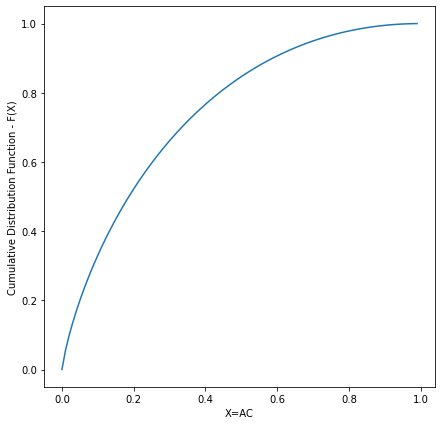

In [15]:
x_label = "X=AC"
y_label = "Cumulative Distribution Function - F(X)"
pdf_data = pd.DataFrame(zip(x_points, y_points), columns=[x_label, y_label])
sb.lineplot(x=x_label, y=y_label, data=pdf_data)